# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | mathba
Processing Record 7 of Set 1 | tinogasta
Processing Record 8 of Set 1 | utrik
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | richfield
Processing Record 13 of Set 1 | orland
Processing Record 14 of Set 1 | cabedelo
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | derzhavinsk
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | palmer
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | skanor med falsterbo
Processing Record 21 of Set 1 | baturaja
Processing Record 22 of Set 1 | us

In [13]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [14]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,6.05,75,43,3.93,CL,1682111513
1,kailua-kona,19.6406,-155.9956,28.61,76,40,5.14,US,1682111498
2,la ronge,55.1001,-105.2842,2.77,49,100,2.53,CA,1682111513
3,talnakh,69.4865,88.3972,-5.44,84,96,4.12,RU,1682111513
4,blackmans bay,-43.0167,147.3167,14.07,84,97,2.30,AU,1682111513


In [15]:
city_data_df.to_csv("C:\\Users\\btdee\\Dropbox\Data Bootcamp\\Weekly Challenges\Module 6\\World_Weather_Analysis\\output_data\\cities.csv", index_label="City_ID")

In [16]:
city_data_df = pd.read_csv("C:\\Users\\btdee\\Dropbox\Data Bootcamp\\Weekly Challenges\Module 6\\World_Weather_Analysis\\output_data\\cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.05,75,43,3.93,CL,1682111513
1,kailua-kona,19.6406,-155.9956,28.61,76,40,5.14,US,1682111498
2,la ronge,55.1001,-105.2842,2.77,49,100,2.53,CA,1682111513
3,talnakh,69.4865,88.3972,-5.44,84,96,4.12,RU,1682111513
4,blackmans bay,-43.0167,147.3167,14.07,84,97,2.30,AU,1682111513


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

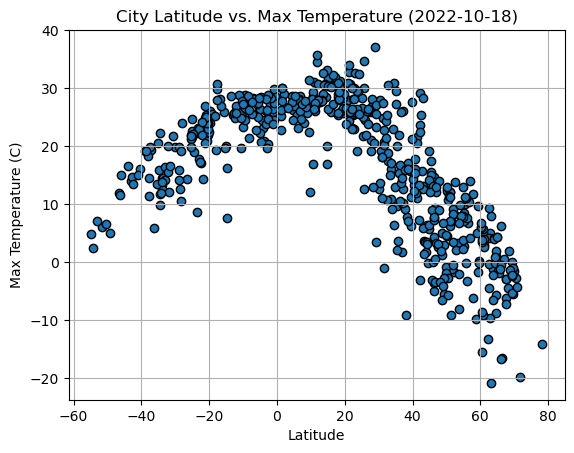

In [18]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.savefig("C:\\Users\\btdee\\Dropbox\Data Bootcamp\\Weekly Challenges\Module 6\\World_Weather_Analysis\\output_data\\Fig1.png")

plt.show()

#### Latitude Vs. Humidity

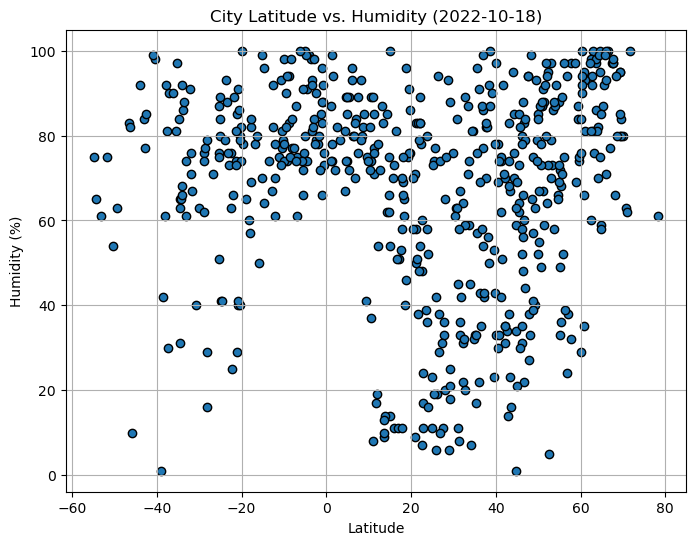

In [20]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("C:\\Users\\btdee\\Dropbox\Data Bootcamp\\Weekly Challenges\Module 6\\World_Weather_Analysis\\output_data\\Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

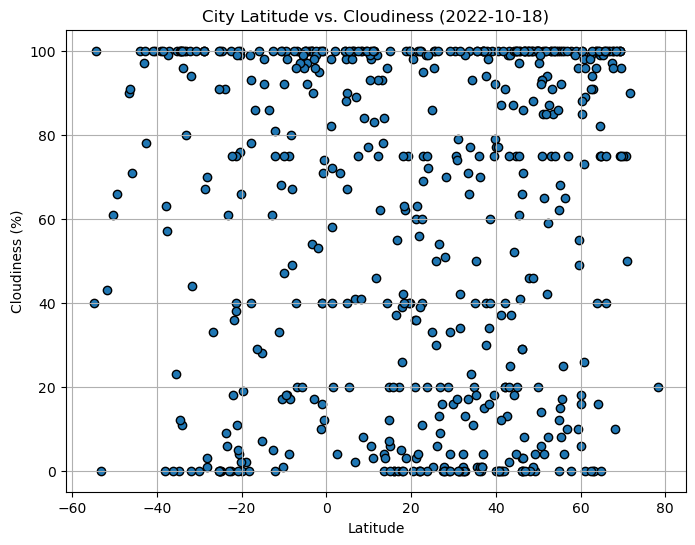

In [21]:
plt.figure(figsize=(8, 6))

plt.grid()
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("C:\\Users\\btdee\\Dropbox\Data Bootcamp\\Weekly Challenges\Module 6\\World_Weather_Analysis\\output_data\\Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

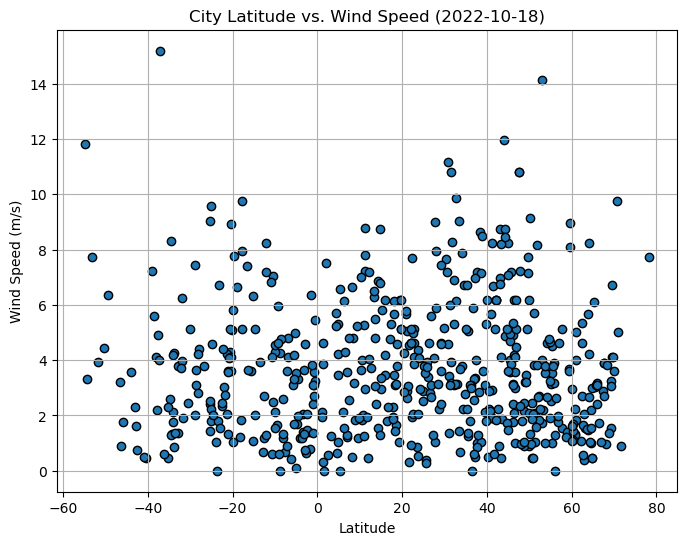

In [22]:
plt.figure(figsize=(8, 6))
plt.grid()

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("C:\\Users\\btdee\\Dropbox\Data Bootcamp\\Weekly Challenges\Module 6\\World_Weather_Analysis\\output_data\\Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [28]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kailua-kona,19.6406,-155.9956,28.61,76,40,5.14,US,1682111498
2,la ronge,55.1001,-105.2842,2.77,49,100,2.53,CA,1682111513
3,talnakh,69.4865,88.3972,-5.44,84,96,4.12,RU,1682111513
5,mathba,22.2855,89.9629,25.35,78,100,1.95,BD,1682111513
7,utrik,11.2278,169.8474,26.88,71,99,7.22,MH,1682111514


In [45]:
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.05,75,43,3.93,CL,1682111513
4,blackmans bay,-43.0167,147.3167,14.07,84,97,2.30,AU,1682111513
6,tinogasta,-28.0632,-67.5649,24.02,29,70,4.39,AR,1682111442
9,waitangi,-43.9535,-176.5597,16.57,92,100,3.58,NZ,1682111330
10,edinburgh of the seven seas,-37.0676,-12.3116,19.30,90,100,15.19,SH,1682111514


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8484607566375013


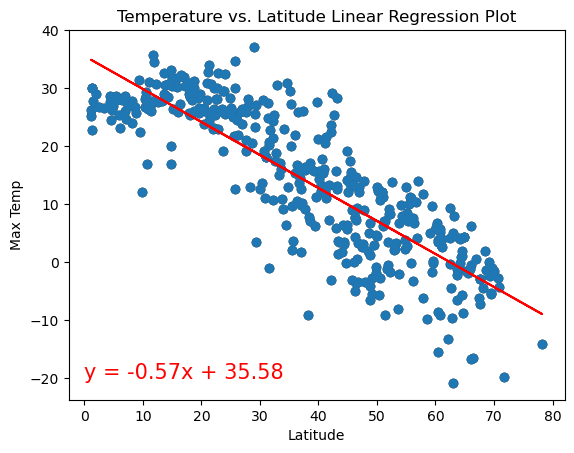

In [44]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors="black", color="blue")
plt.plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temperature vs. Latitude Linear Regression Plot", "Max Temp", (0,-20))
plt.show()

The r-value is: 0.8004906643318057


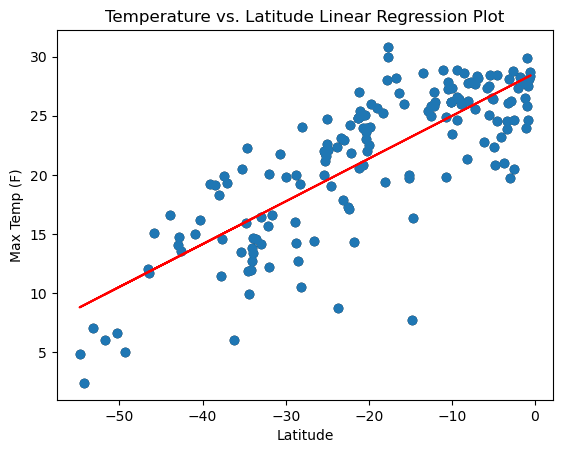

In [63]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors="black", color="blue")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temperature vs. Latitude Linear Regression Plot", "Max Temp (F)", (-50,80))

plt.show()

**Discussion about the linear relationship:**
The linear regression plot for temperature vs latitude shows a strong positive correlation between temperature and latitude in the Southern Hemisphere. The r-value is 0.80, indicating a strong positive correlation between temperature and latitude. This indicates that as we move closer to the equator, the temperature tends to increase in the Southern Hemisphere.

In the Northern Hemisphere, the linear regression plot shows a strong negative correlation with an r-value of -0.85, indicating a strong negative correlation between temperature and latitude. This indicates that as we move further away from the equator in the Northern Hemisphere, the temperature tends to decrease. Overall, the data suggests that temperature is closely related to latitude in both hemispheres, but the relationship is inverse between them.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20373979581025614


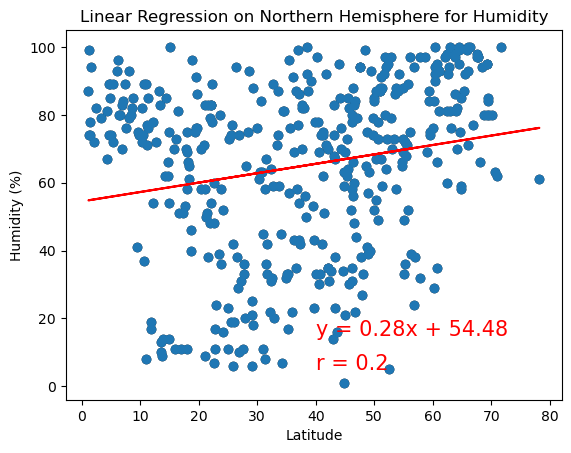

In [74]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black", color="blue")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Linear Regression on Northern Hemisphere for Humidity", "Humidity (%)", (40,15))
plt.show()

The r-value is: 0.3024606964171793


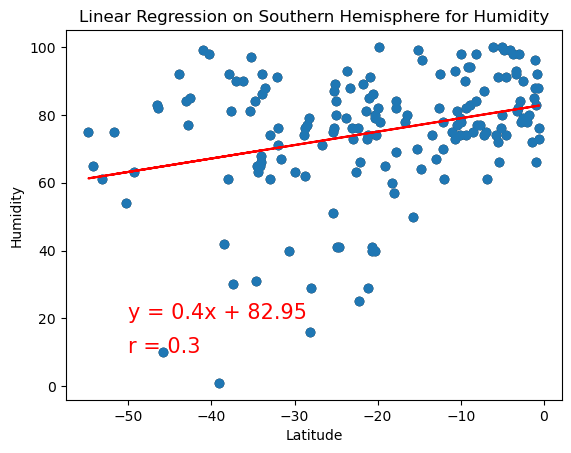

In [70]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black", color="blue")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Linear Regression on Southern Hemisphere for Humidity", "Humidity", (-50,20))
plt.show()

**Discussion about the linear relationship:**
The linear regression plots for humidity vs latitude show a weak positive correlation between humidity and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere, the r-value is 0.20, indicating a weak positive correlation between humidity and latitude.  In the Southern Hemisphere, the r-value is 0.30, indicating a slightly stronger positive correlation between humidity and latitude. Overall, the data suggests that humidity and latitude have a weak positive relationship in both hemispheres, but the correlation is slightly stronger in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13100624733964775


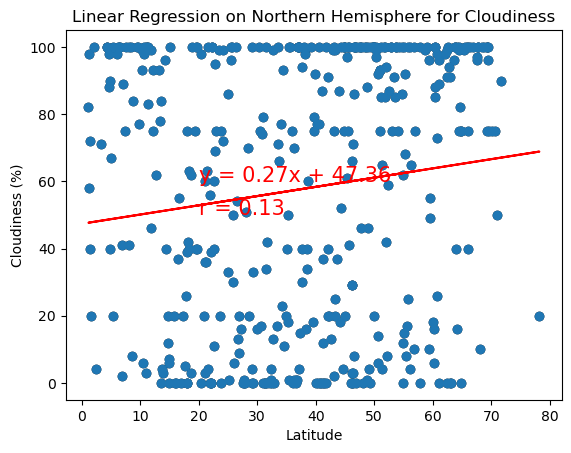

In [76]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black", color="blue")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Linear Regression on Northern Hemisphere for Cloudiness", "Cloudiness (%)", (20,60))
plt.show()


The r-value is: 0.032411468163443424


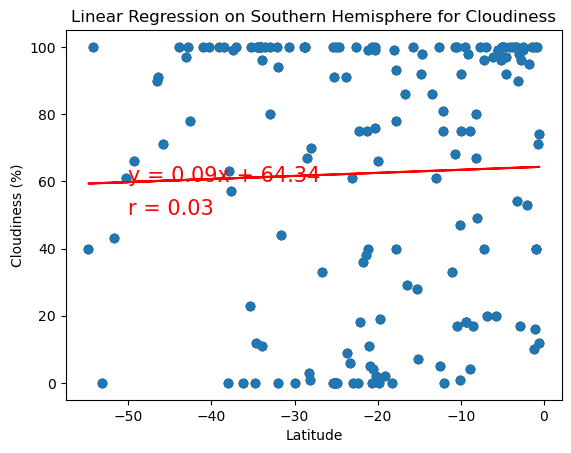

In [77]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black", color="blue")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Linear Regression on Southern Hemisphere for Cloudiness", "Cloudiness (%)", (-50,60))
plt.show()


**Discussion about the linear relationship:**
The linear regression plots for cloudiness vs latitude show a very weak positive correlation between cloudiness and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere, the r-value is 0.13, indicating a very weak positive correlation between cloudiness and latitude. In the Southern Hemisphere, the r-value is 0.03, indicating a very weak positive correlation between cloudiness and latitude. Overall, the data suggests that cloudiness and latitude have a very weak positive relationship in both hemispheres, but the correlation is slightly stronger in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07418839795150735


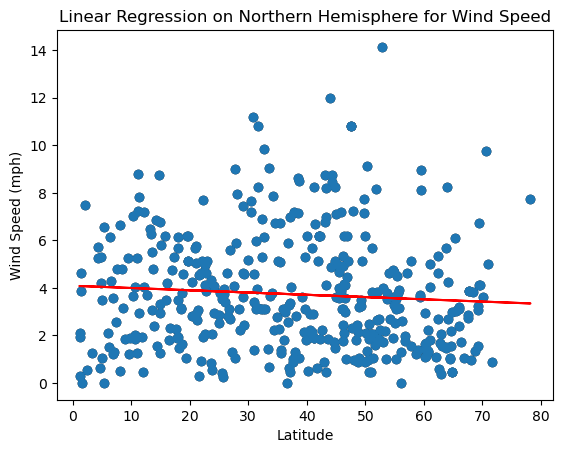

In [78]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black", color="blue")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression on Northern Hemisphere for Wind Speed", "Wind Speed (mph)", (40,25))
plt.show()

The r-value is: -0.1677328198543144


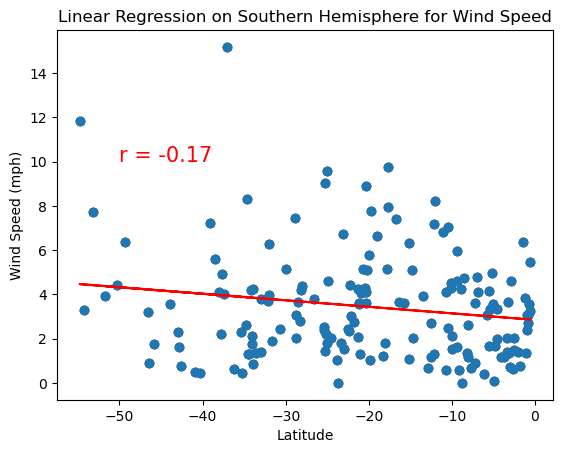

In [79]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black", color="blue")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression on Southern Hemisphere for Wind Speed", "Wind Speed (mph)", (-50,20))
plt.show()

**Discussion about the linear relationship:**
The linear regression plots for wind speed vs latitude show a weak negative correlation between wind speed and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere, the r-value is -0.07, indicating a very weak negative correlation between wind speed and latitude. In the Southern Hemisphere, the r-value is -0.17, indicating a slightly stronger negative correlation between wind speed and latitude. Overall, the data suggests that wind speed and latitude have a weak negative relationship in both hemispheres, but the correlation is slightly stronger in the Southern Hemisphere.
